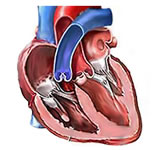

# Heart Disease Prediction

This project focuses on predicting heart disease based on attributes such as blood pressure, cholesterol levels, heart rate, and other characteristic attributes. Patients are classified as to whether they have coronary artery disease or not. This project utilizes a dataset of 303 patients distributed by the UCI Machine Learning Repository.

The dataset is available through the University of California, Irvine Machine learning repository. Here is the URL:

http:////archive.ics.uci.edu/ml/datasets/Heart+Disease

This dataset contains patient data concerning heart disease diagnosis that was collected at several locations around the world. There are 76 attributes, including age, sex, resting blood pressure, cholestoral levels, echocardiogram data, exercise habits, and many others. To data, all published studies using this data focus on a subset of 14 attributes. This project also uses these 14 features. More specifically, this project uses the data collected at the Cleveland Clinic Foundation.

This project uses some common Python libraries, such as pandas, numpy, matplotlib and seaborn. Furthermore, for the machine learning side of this project, sklearn and keras is used.

**Attribute Information:**

Only 14 attributes used:
1. (age): age in years
2. (sex): sex (1 = male; 0 = female)
3. (cp): chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
4. (trestbps): trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. (chol): serum cholestoral in mg/dl
6. (fbs): fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. (restecg): restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. (thalach): thalach: maximum heart rate achieved
9. (exang): exercise induced angina (1 = yes; 0 = no)
10. (oldpeak): oldpeak = ST depression induced by exercise relative to rest
11. (slope): slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
12. (ca): ca: number of major vessels (0-3) colored by flourosopy
13. (thal): thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. (num) (the predicted attribute): num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# The names will be the names of each column in my pandas DataFrame
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

# Read the csv
cleveland = pd.read_csv(url, names=names)

cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [4]:
cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


# Data Wrangling
**1. What kind of cleaning steps did you perform?**

The data looks good and hence no cleaning required as there are no missing values nor there are any text values present in the dataset. Hence no dummy variables required. All the features are of the type float64 except for 'ca' and 'thal' which are object types. I'll concentrate on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). So, I'll be replacing values 2,3,4 with the value 1.

In [5]:
for i in cleveland['class'].index:
    if cleveland['class'][i] == 2 or cleveland['class'][i] == 3 or cleveland['class'][i] == 4:
        cleveland['class'][i] = 1
print(cleveland['class'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: class, Length: 303, dtype: int64


There are some rows having '?' values which we'll be dropping.

In [6]:
# Get indexes where ca and thal columns has value '?'
indexNames = cleveland[(cleveland['ca'] == '?') | (cleveland['thal'] == '?')].index

print(indexNames)

# Delete these row indexes from dataFrame cleveland.drop(indexNames , inplace=True)
cleveland.drop(indexNames , inplace=True)
print(cleveland.shape)

Int64Index([87, 166, 192, 266, 287, 302], dtype='int64')
(297, 14)


In [7]:
cleveland['sex']=cleveland['sex'].replace([1.0,0.0], ['Male', 'Female'])
cleveland['cp']=cleveland['cp'].replace([1.0,2.0,3.0,4.0], ['Typical angina', 'Atypical angina','Non-anginal pain','Asymptomatic pain'])
cleveland['fbs']=cleveland['fbs'].replace([1.0,0.0], ['Yes', 'No'])
cleveland['exang']=cleveland['exang'].replace([1.0,0.0], ['Yes', 'No'])
cleveland['restecg']=cleveland['restecg'].replace([0.0,1.0,2.0], ['Normal', 'Abnormality','Hypertrophy'])
cleveland['slope']=cleveland['slope'].replace([1.0,2.0,3.0], ['Upsloping','Flat','Down-sloping'])
cleveland['class']=cleveland['class'].replace([0,1], ['Absence', 'Presence'])

cleveland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    object 
 2   cp        297 non-null    object 
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    object 
 6   restecg   297 non-null    object 
 7   thalach   297 non-null    float64
 8   exang     297 non-null    object 
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    object 
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  class     297 non-null    object 
dtypes: float64(5), object(9)
memory usage: 34.8+ KB


**2. How did you deal with missing values, if any?**

There are no missing values in the dataset.

**3. Were there outliers, and how did you handle them?**

To detect the outliers we plot the boxplot for the quantitative features 'age', 'trestbps', 'chol', 'thalach' and 'oldpeak'   as below. No chance of outliers for categorical features. We can see that features 'trestbps', 'chol', 'thalach' and 'oldpeak' have outliers. We have dealt with the outliers by replacing them with mean.

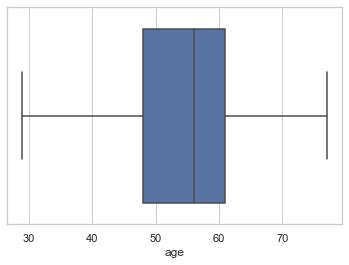

In [8]:
sns.boxplot(cleveland['age'])

The variance for trestbps is 314.4549422394538 



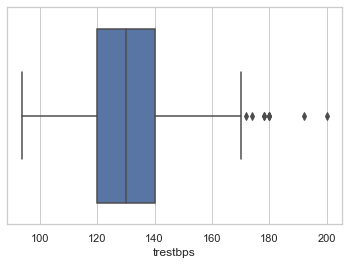

In [9]:
print('The variance for trestbps is', np.var(cleveland['trestbps'].array), '\n')
sns.boxplot(cleveland['trestbps'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


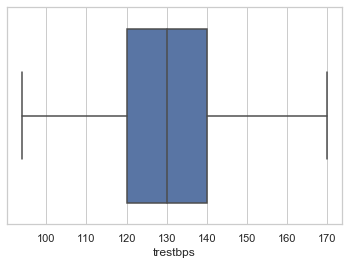

In [10]:
IQR1 = cleveland['trestbps'].quantile(0.75) - cleveland['trestbps'].quantile(0.25)
upper_boundary1 = cleveland['trestbps'].quantile(0.75) + (IQR1 * 1.5)
mean1 = cleveland['trestbps'].mean()
for i in cleveland['trestbps'].index:
    if cleveland['trestbps'][i] > upper_boundary1:
        cleveland['trestbps'][i] = mean1
sns.boxplot(cleveland['trestbps'])

The variance for chol is 2694.645058894216 



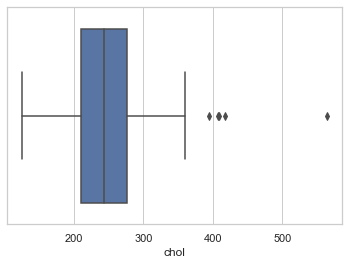

In [11]:
print('The variance for chol is', np.var(cleveland['chol'].array), '\n')
sns.boxplot(cleveland['chol'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


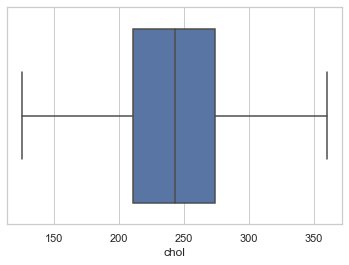

In [12]:
IQR2 = cleveland['chol'].quantile(0.75) - cleveland['chol'].quantile(0.25)
upper_boundary2 = cleveland['chol'].quantile(0.75) + (IQR2 * 1.5)
mean2 = cleveland['chol'].mean()
for i in cleveland['chol'].index:
    if cleveland['chol'][i] > upper_boundary2:
        cleveland['chol'][i] = mean2
sns.boxplot(cleveland['chol'])

The variance for thalach is 524.5431645296965 



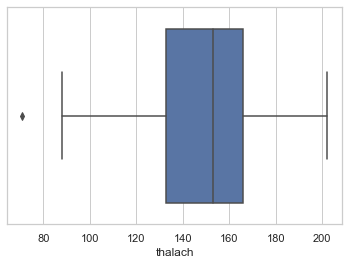

In [13]:
print('The variance for thalach is', np.var(cleveland['thalach'].array), '\n')
sns.boxplot(cleveland['thalach'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


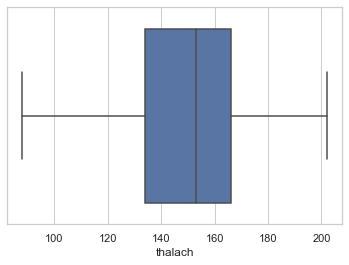

In [14]:
IQR3 = cleveland['thalach'].quantile(0.75) - cleveland['thalach'].quantile(0.25)
lower_boundary3 = cleveland['thalach'].quantile(0.25) - (IQR3 * 1.5)
mean3 = cleveland['thalach'].mean()
for i in cleveland['thalach'].index:
    if cleveland['thalach'][i] < lower_boundary3:
        cleveland['thalach'][i] = mean3
sns.boxplot(cleveland['thalach'])

If variance is high always 1 or 2 points will lie outside the whiskers. They can be ignored.

The variance for oldpeak is 1.3552637485970818 



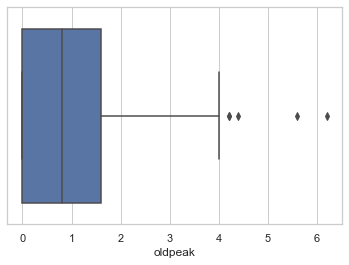

In [15]:
print('The variance for oldpeak is', np.var(cleveland['oldpeak'].array), '\n')
sns.boxplot(cleveland['oldpeak'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


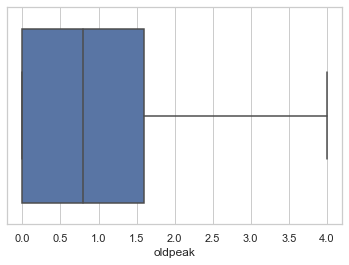

In [16]:
IQR4 = cleveland['oldpeak'].quantile(0.75) - cleveland['oldpeak'].quantile(0.25)
upper_boundary4 = cleveland['oldpeak'].quantile(0.75) + (IQR4 * 1.5)
mean4 = cleveland['oldpeak'].mean()
for i in cleveland['oldpeak'].index:
    if cleveland['oldpeak'][i] > upper_boundary4:
        cleveland['oldpeak'][i] = mean4
sns.boxplot(cleveland['oldpeak'])

# Data Storytelling

**Let's explore the features.**

**1. How many people are suffering from heart disease?**

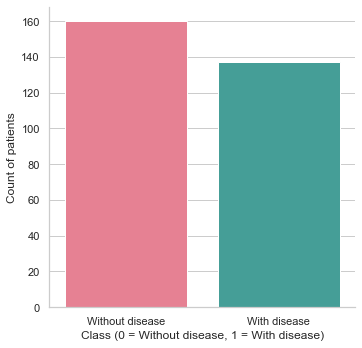

In [17]:
ax = sns.catplot(x='class', kind='count',data=cleveland, palette='husl')
plt.xlabel('Class (0 = Without disease, 1 = With disease)')
plt.ylabel('Count of patients')
ax.set_xticklabels(['Without disease', 'With disease'])

**2. Are males more prone to heart disease than females?**

Yes.

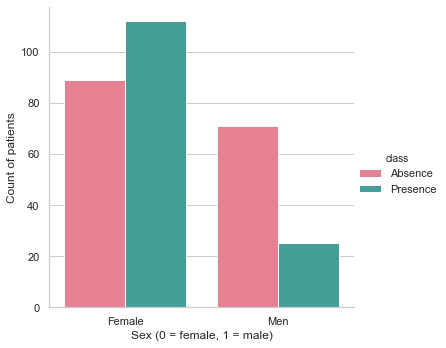

In [18]:
ax = sns.catplot(x='sex', hue='class', kind='count',data=cleveland, palette='husl')
plt.xlabel('Sex (0 = female, 1 = male)')
plt.ylabel('Count of patients')
ax.set_xticklabels(['Female', 'Men'])

**3. Which age group is more prone to heart disease?**

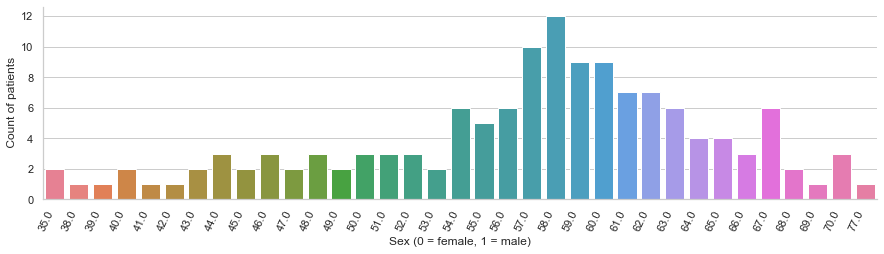

In [19]:
ax = sns.catplot(x='age', kind='count', data=cleveland[cleveland['class'] == 'Presence'], palette='husl', aspect=3.5, height=3.5)
plt.xlabel('Sex (0 = female, 1 = male)')
plt.ylabel(' Count of patients')
ax.set_xticklabels(rotation=65, horizontalalignment='right')

**INSIGHT**: The age group 57 to 60 is more prone to heart disease.

**4. Is there a relation between fasting blood sugar and heart disease?**

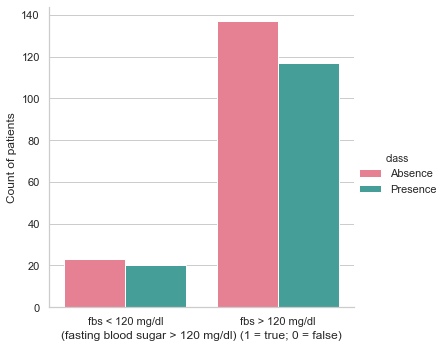

In [20]:
ax = sns.catplot(x='fbs', hue='class', kind='count',data=cleveland, palette='husl')
plt.xlabel('(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.ylabel('Count of patients')
ax.set_xticklabels(['fbs < 120 mg/dl', 'fbs > 120 mg/dl'])

**INSIGHT** : People having fps < 120 have more chance of having Heart Disease than people havnig fps >120.

**5. Is there a relation between resting electrocardiographic results and heart disease?**

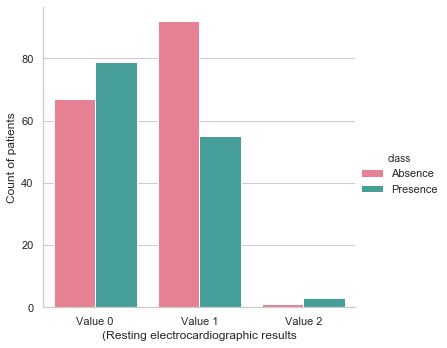

In [21]:
ax = sns.catplot(x='restecg', hue='class', kind='count',data=cleveland, palette='husl')
plt.xlabel('(Resting electrocardiographic results')
plt.ylabel('Count of patients')
ax.set_xticklabels(['Value 0', 'Value 1', 'Value 2'])

**INSIGHT** : If resting electrocardiographic is 2 then person have more chances of suffering from Heart Disease.

**6. Is there a relation between  slope of the peak exercise ST segment and heart disease?**

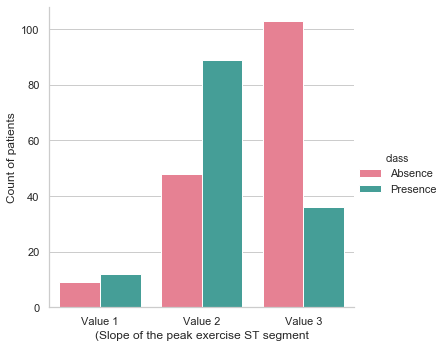

In [22]:
ax = sns.catplot(x='slope', hue='class', kind='count',data=cleveland, palette='husl')
plt.xlabel('(Slope of the peak exercise ST segment')
plt.ylabel('Count of patients')
ax.set_xticklabels(['Value 1', 'Value 2', 'Value 3'])

**INSIGHT** : People having up flat slope are more prone to Heart Disease than upsloping and downsloping.

**Let's explore continuous data against categorical and ordinal data.**

**1. Trestbps:**

Text(0.5, 1.0, 'Trestbps V/S CA (Major Vessel Coloured)')

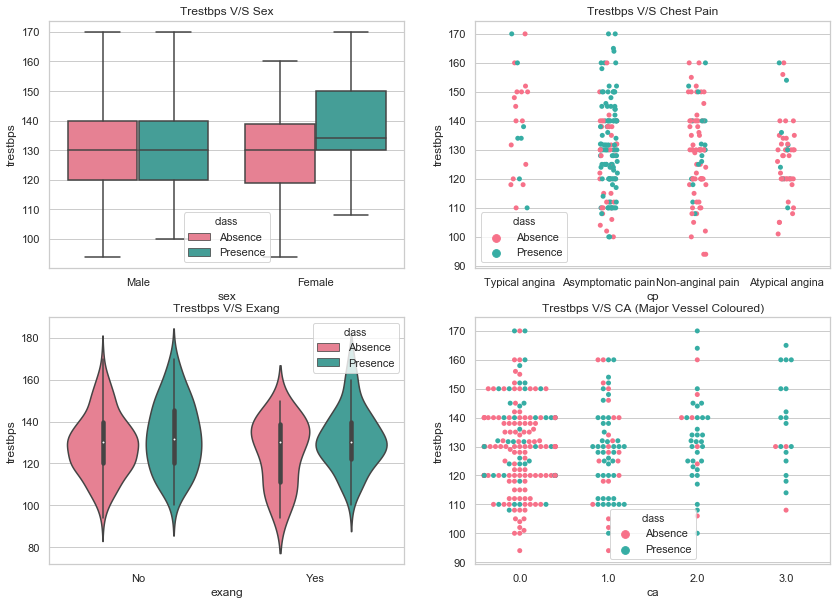

In [23]:
fig, ax = plt.subplots(2, 2 ,figsize=(14,10))
sns.boxplot(x='sex', y='trestbps',data=cleveland, hue='class', ax=ax[0][0], palette='husl')
ax[0,0].set_title("Trestbps V/S Sex")
sns.stripplot(x='cp', y='trestbps',data=cleveland, hue='class', ax=ax[0][1], palette='husl')
ax[0,1].set_title("Trestbps V/S Chest Pain")
sns.violinplot(x='exang', y='trestbps',data=cleveland, hue='class', ax=ax[1][0], palette='husl')
ax[1,0].set_title("Trestbps V/S Exang")
sns.swarmplot(x='ca', y='trestbps',data=cleveland, hue='class', ax=ax[1][1], palette='husl')
ax[1,1].set_title("Trestbps V/S CA (Major Vessel Coloured)")

**INSIGHT:** Based on above analysis we can say that gender plays minor role with respect to blood pressure (trestbps). But chest pain play's vital role . As chest pain increases blood pressure will also increases along with chances of heart diseases.

**2. Cholestrol:**

Text(0.5, 1.0, 'Cholestrol V/S Thal')

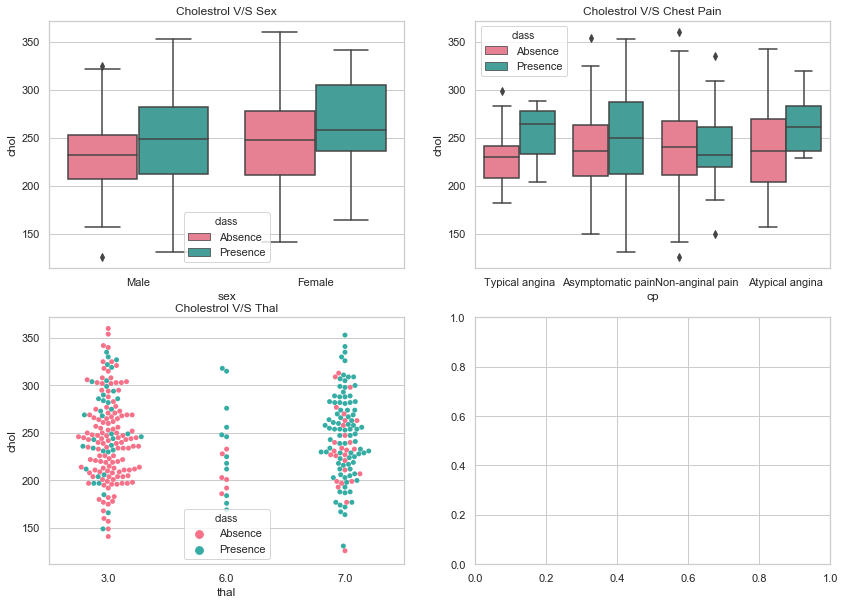

In [24]:
fig, ax  = plt.subplots(2,2,figsize=(14,10))
sns.boxplot(x='sex', y='chol',data=cleveland, hue='class', ax=ax[0,0], palette='husl')
ax[0,0].set_title("Cholestrol V/S Sex")
sns.boxplot(x='cp', y='chol', data=cleveland, hue='class', ax=ax[0,1], palette='husl')
ax[0,1].set_title("Cholestrol V/S Chest Pain")
sns.swarmplot(x='thal', y='chol', data=cleveland, hue='class', ax=ax[1,0], palette='husl')
ax[1,0].set_title("Cholestrol V/S Thal")

**INSIGHT:** Female have higher cholestrol level than men. Chances of heart diseases decreases with decrease in cholestrol level.

**3. Oldpeak:**

Text(0.5, 1.0, 'oldpeak V/S CA')

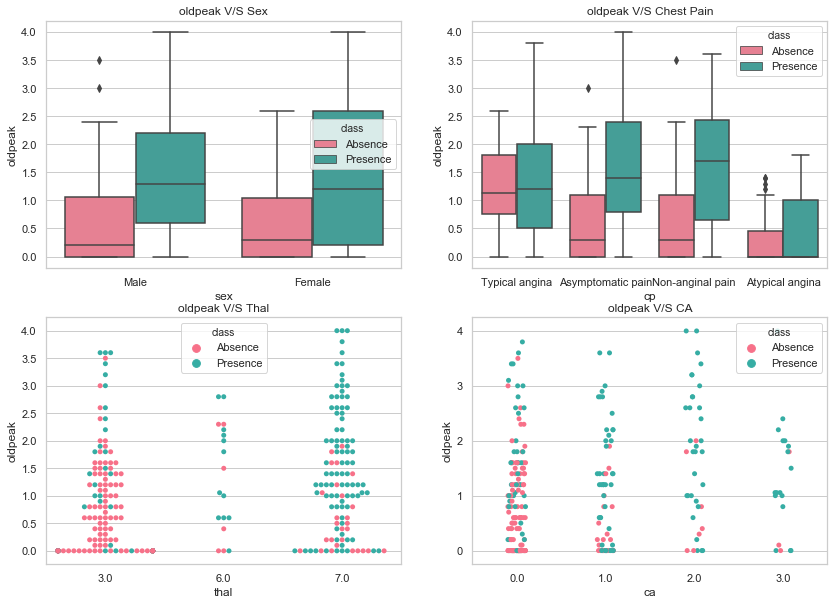

In [25]:
fig, ax = plt.subplots(2,2,figsize=(14,10))
sns.boxplot(x='sex', y='oldpeak', data=cleveland, hue='class', ax=ax[0,0], palette='husl')
ax[0,0].set_title("oldpeak V/S Sex")
sns.boxplot(x='cp', y='oldpeak', data=cleveland, hue='class', ax=ax[0,1], palette='husl')
ax[0,1].set_title("oldpeak V/S Chest Pain")
sns.swarmplot(x='thal', y='oldpeak', data=cleveland, hue='class', ax=ax[1,0], palette='husl')
ax[1,0].set_title("oldpeak V/S Thal")
sns.stripplot(x='ca', y='oldpeak', data=cleveland, hue='class', ax=ax[1,1], palette='husl')
ax[1,1].set_title("oldpeak V/S CA")

**INSIGHT:** If oldpeak is less then people will have less chances of having heart diseases.

# Apply Inferential Statistics

**Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?**

## Numerical Variables
We use correlation to see how the numerical features are related to each other.

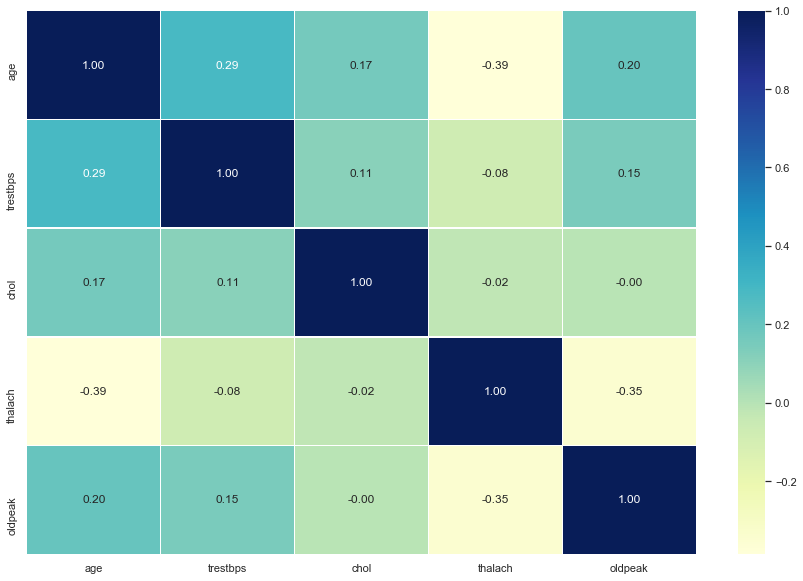

In [26]:
corrMatrix = cleveland

corrMatrix = corrMatrix.corr()

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corrMatrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

**INSIGHT:** There are no strong correlations between numerical independent features.

**What are the most appropriate tests to use to analyse these relationships?**

## Numerical Variables v/s Categorical Variables
We use ANOVA to see how the numerical features are related to categorical features.

The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of two or more independent (unrelated) groups (although you tend to only see it used when there are a minimum of three, rather than two groups).

In [27]:
cleveland_anova = cleveland

cleveland_anova = cleveland_anova.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], axis=1)
cleveland_anova

,age,trestbps,chol,thalach,oldpeak,class
0,63.0,145.0,233.0,150.0,2.3,Absence
1,67.0,160.0,286.0,108.0,1.5,Presence
2,67.0,120.0,229.0,129.0,2.6,Presence
3,37.0,130.0,250.0,187.0,3.5,Absence
4,41.0,130.0,204.0,172.0,1.4,Absence
...,...,...,...,...,...,...
297,57.0,140.0,241.0,123.0,0.2,Presence
298,45.0,110.0,264.0,132.0,1.2,Presence
299,68.0,144.0,193.0,141.0,3.4,Presence
300,57.0,130.0,131.0,115.0,1.2,Presence


In [28]:
import scipy.stats as stats

# Significance level
alpha = 0.05  
# Perform One Way ANOVA
outcome = stats.f_oneway(cleveland_anova['age'], cleveland_anova['trestbps'], cleveland_anova['chol'],
                         cleveland_anova['thalach'], cleveland_anova['oldpeak'])
# gettin p-value of test
p_value= outcome[1]

#Null hypothesis mu_1 = mu_2 = mu_3 = mu_4 = mu_5
if p_value <= alpha:
    # we reject null hypothesis
    print('Null hypothesis is unlikely to except.')
else:
    # we reject alternative hypothesis
    print('Null hypothesis cannot be rejected.')

Null hypothesis is unlikely to except.


**INSIGHT:** We reject null hypothesis.

## Categorical Variables
We use Chi Square to see how the numerical features are related to categorical features.

**Sex**

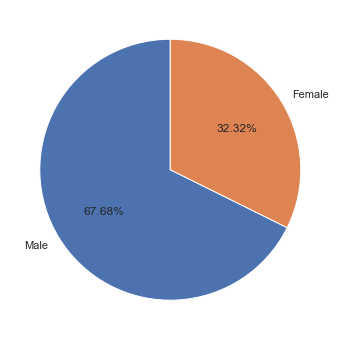

In [29]:
fig, ax = plt.subplots(figsize=(10,6))

male = len(cleveland[cleveland['sex'] == 'Male'])
female = len(cleveland[cleveland['sex'] == 'Female'])
ax = plt.pie(x=[male, female], explode=(0, 0), labels=['Male', 'Female'], autopct='%1.2f%%', startangle=90)
plt.show()

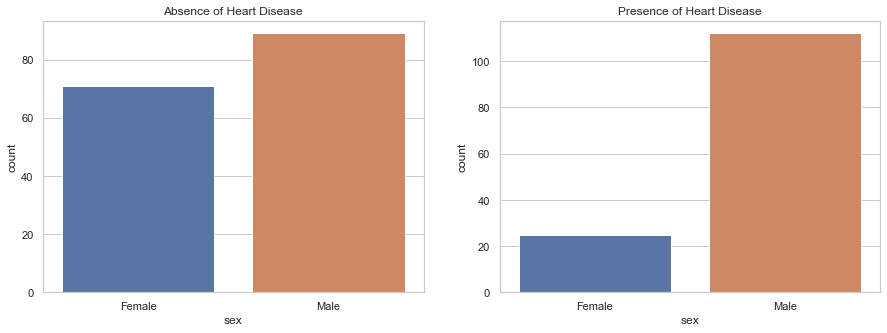

In [30]:
absence = cleveland[cleveland["class"] == 'Absence']["sex"].sort_values()
presence = cleveland[cleveland["class"] == 'Presence']["sex"].sort_values()
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(absence, data=cleveland,ax=axes[0]).set_title('Absence of Heart Disease')
sns.countplot(presence, data=cleveland,ax=axes[1]).set_title('Presence of Heart Disease')
plt.show()

In [31]:
# Chi-square test of independence of variables
cont = pd.crosstab(cleveland['sex'], cleveland['class'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi statistics is {chi_stat[0]} and  p value is {chi_stat[1]}')
# Null hypothesis : Gender is not associated with Goal
# Alternate hypothesis : Gender is associated with Goal 

Chi statistics is 21.851612168613475 and  p value is 2.945690038078843e-06


**INSIGHT:** As expected, given the low p-value(2.666712348180942e-06), so we reject null hypothesis and the test result detect a significant relationship between Sex and Class.

**Chest Pain Type**

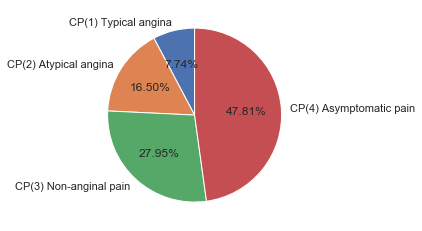

In [32]:
x = [len(cleveland[cleveland['cp'] == 'Typical angina']),len(cleveland[cleveland['cp'] == 'Atypical angina']), len(cleveland[cleveland['cp'] == 'Non-anginal pain']), len(cleveland[cleveland['cp'] == 'Asymptomatic pain'])]
plt.pie(x, data=cleveland, labels=['CP(1) Typical angina', 'CP(2) Atypical angina', 'CP(3) Non-anginal pain', 'CP(4) Asymptomatic pain'], autopct='%1.2f%%',startangle=90)
plt.show()

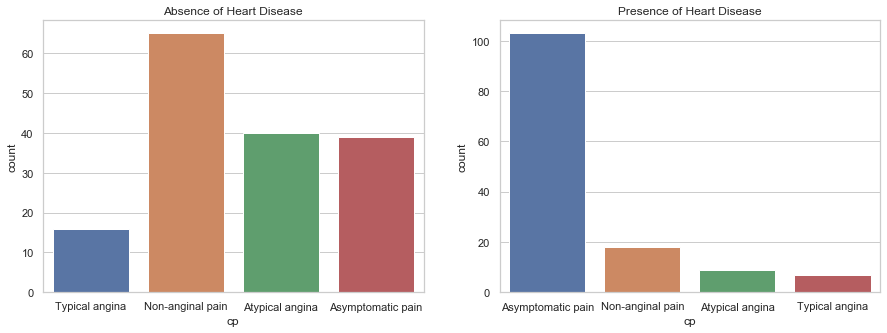

In [33]:
f, axes = plt.subplots(1,2,figsize=(15,5))
absence = cleveland[cleveland["class"]=='Absence']["cp"]
presence = cleveland[cleveland["class"]=='Presence']["cp"]
sns.countplot(absence, data=cleveland,ax=axes[0]).set_title('Absence of Heart Disease')
sns.countplot(presence, data=cleveland,ax=axes[1]).set_title('Presence of Heart Disease')
plt.show()

In [34]:
# Chi-square test of independence of variables
cont = pd.crosstab(cleveland['cp'], cleveland['class'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi statistics is {chi_stat[0]} and  p value is {chi_stat[1]}')
# Null hypothesis : Chest Pain is not associated with Goal
# Alternate hypothesis : Chest Pain is associated with Goal 

Chi statistics is 77.27579978222383 and  p value is 1.1782838465918115e-16


**INSIGHT:** As expected, given the low p-value, so we reject null hypothesis and the test result detect a significant relationship between cp and class. Presence of disease graph have 104 patients with Chest pain type 4 much higher as compared to other chest pain. So, Asymptomatic pain can high predictive power.

**Fasting Blood Sugar**

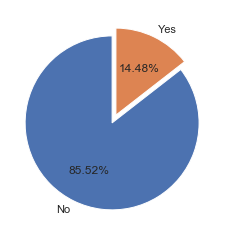

In [35]:
sizes = [len(cleveland[cleveland['fbs'] == 'No']), len(cleveland[cleveland['fbs'] == 'Yes'])]
labels = ['No', 'Yes']
plt.pie(x=sizes, labels=labels, explode=(0.1, 0), autopct="%1.2f%%", startangle=90)
plt.show()
# Fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

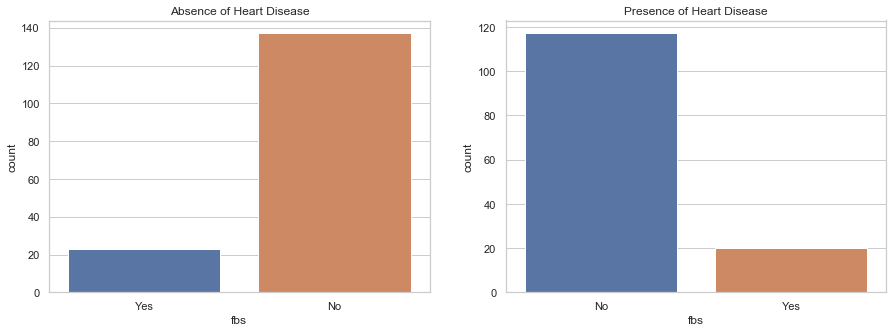

In [36]:
f, axes = plt.subplots(1,2,figsize=(15,5))
absence = cleveland[cleveland["class"]=='Absence']["fbs"]
presence = cleveland[cleveland["class"]=='Presence']["fbs"]
sns.countplot(absence, data=cleveland,ax=axes[0]).set_title('Absence of Heart Disease')
sns.countplot(presence, data=cleveland,ax=axes[1]).set_title('Presence of Heart Disease')
plt.show()

In [37]:
# Chi-square test of independence of variables
cont = pd.crosstab(cleveland['fbs'],cleveland['class'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi statistics is {chi_stat[0]} and  p value is {chi_stat[1]}')
# Null hypothesis : FBS is not associated with Goal
# Alternate hypothesis : FBS is associated with Goal 

Chi statistics is 0.01228173970336428 and  p value is 0.91175669783748


**INSIGHT:** As expected, given the high p-value, so we fail to reject null hypothesis and the test result detect a non-significant relationship between Fbs and Goal. Most individuals did not have fasting blood sugar levels greater than 120 mg/dL. This did not change greatly when the data was divided based on the presence of disease.So, FBS is not a predictive feature.

**Resting ECG Results**

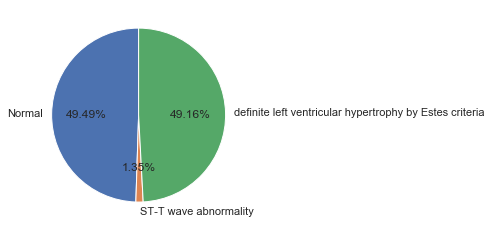

In [38]:
sizes = [len(cleveland[cleveland['restecg'] =='Normal']), len(cleveland[cleveland['restecg']=='Abnormality']), len(cleveland[cleveland['restecg']=='Hypertrophy'])]
labels = ['Normal', 'ST-T wave abnormality', 'definite left ventricular hypertrophy by Estes criteria']
plt.pie(x=sizes, labels=labels, explode=(0, 0, 0), autopct="%1.2f%%", startangle=90)
plt.show()

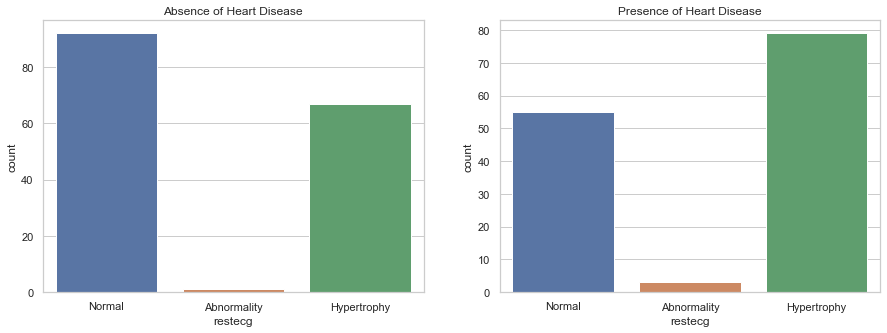

In [39]:
f, axes = plt.subplots(1,2,figsize=(15,5))
absence = cleveland[cleveland["class"]=='Absence']["restecg"]
presence = cleveland[cleveland["class"]=='Presence']["restecg"]
sns.countplot(absence, data=cleveland,ax=axes[0],order=['Normal', 'Abnormality', 'Hypertrophy']).set_title('Absence of Heart Disease')
sns.countplot(presence,ax=axes[1],order=['Normal', 'Abnormality', 'Hypertrophy']).set_title('Presence of Heart Disease')
plt.show()

In [40]:
print(f'Probability of Hypertropy in disease cohorts {presence[presence=="Hypertrophy"].value_counts()/len(presence)}')
print(f'Probability of Hypertropy in non-disease cohorts {absence[absence=="Hypertrophy"].value_counts()/len(absence)}')

Probability of Hypertropy in disease cohorts Hypertrophy    0.576642
Name: restecg, dtype: float64
Probability of Hypertropy in non-disease cohorts Hypertrophy    0.41875
Name: restecg, dtype: float64


In [41]:
cont = pd.crosstab(cleveland['restecg'],cleveland['class'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi statistics is {chi_stat[0]} and  p value is {chi_stat[1]}')
#Null hypothesis : Exang is not associated with Goal
#Alternate hypothesis : Exang is associated with Goal 

Chi statistics is 9.575507229251564 and  p value is 0.008331151353680854


**INSIGHT**: Most patients exhibited normal resting electrocardiograhic results . However, a higher proportion of diseased patients had hypertropy suggesting that this feature may contribute some predictive power.

**Exercise Induced Angina**

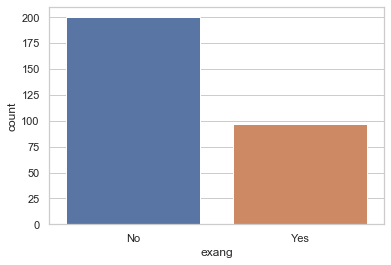

In [42]:
sns.countplot(data = cleveland , x = 'exang')
# exercise induced angina (1 = yes; 0 = no)

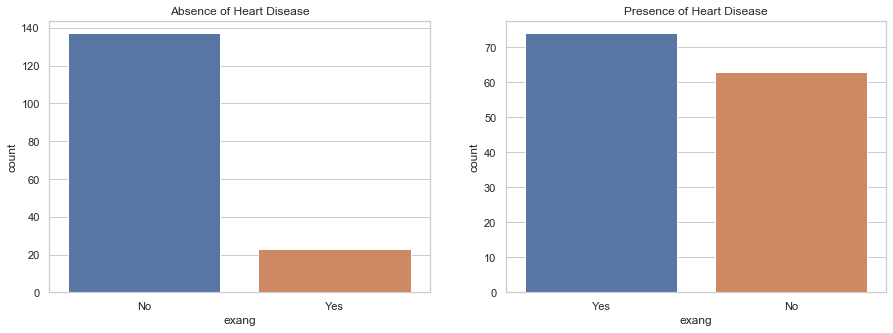

In [43]:
f, axes = plt.subplots(1,2,figsize=(15,5))
absence = cleveland[cleveland["class"]=='Absence']["exang"]
presence = cleveland[cleveland["class"]=='Presence']["exang"]
sns.countplot(absence, data=cleveland,ax=axes[0]).set_title('Absence of Heart Disease')
sns.countplot(presence, data=cleveland,ax=axes[1]).set_title('Presence of Heart Disease')
plt.show()

In [44]:
# Chi-square test of independence of variables
cont = pd.crosstab(cleveland['exang'], cleveland['class'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi statistics is {chi_stat[0]} and  p value is {chi_stat[1]}')
# Null hypothesis : Exang is not associated with Goal
# Alternate hypothesis : Exang is associated with Goal

Chi statistics is 50.9425597633616 and  p value is 9.510884265909016e-13


**INSIGHT:** As expected, given the low p-value, so we reject null hypothesis and the test result detect a significant relationship between Exang and Goal. Significantly more patients in the diseased cohort displayed exercise induced angina. This feature should be strongly predictive.

**Peak Exercise ST Segment**

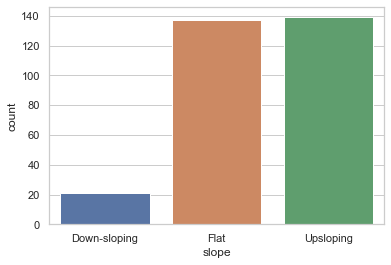

In [45]:
sns.countplot(data = cleveland , x = 'slope')

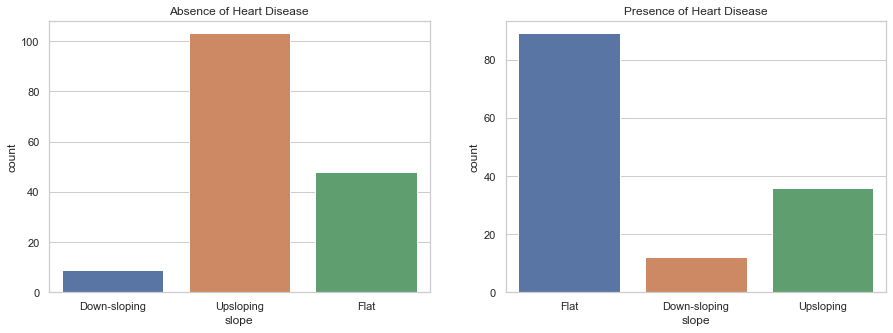

In [46]:
f, axes = plt.subplots(1,2,figsize=(15,5))
absence = cleveland[cleveland["class"]=='Absence']["slope"]
presence = cleveland[cleveland["class"]=='Presence']["slope"]
sns.countplot(absence, data=cleveland,ax=axes[0]).set_title('Absence of Heart Disease')
sns.countplot(presence, data=cleveland,ax=axes[1]).set_title('Presence of Heart Disease')
plt.show()

In [47]:
# Chi-square test of independence of variables
cont = pd.crosstab(cleveland['slope'],cleveland['class'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi statistics is {chi_stat[0]} and  p value is {chi_stat[1]}')
#Null hypothesis : Slope is not associated with Goal
#Alternate hypothesis : Slope is associated with Goal

Chi statistics is 43.47317755212573 and  p value is 3.630107106911135e-10


**INSIGHT:** As expected, given the low p-value, so we reject null hypothesis and the test result detect a significant relationship between Slope and Goal. Significantly more patients in the non-diseased cohort displayed Slope-Flat. This feature could be strongly predictive. The slope of the peak exercise ST segment differed between the non-disease and diseased cohorts with the majority of cardiac disease patients exhibiting a flat ST slope(value = 2).This can also have good predictive power.

**Number of Blood Vessels**

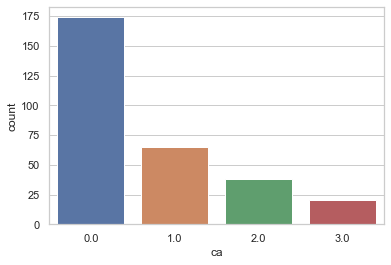

In [48]:
sns.countplot(data = cleveland , x = 'ca')

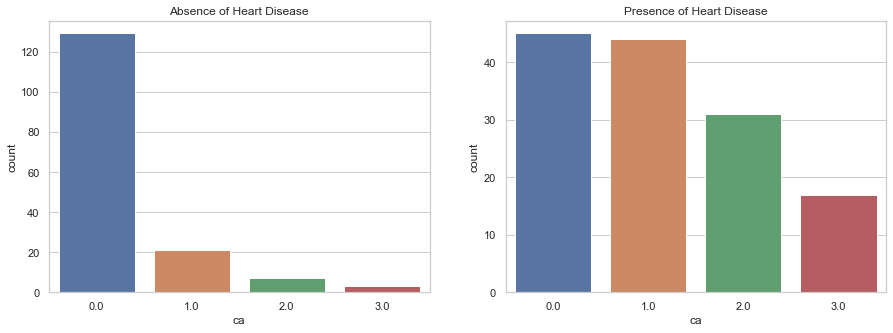

In [49]:
f, axes = plt.subplots(1,2,figsize=(15,5))
absence = cleveland[cleveland["class"]=='Absence']["ca"]
presence = cleveland[cleveland["class"]=='Presence']["ca"]
sns.countplot(absence, data=cleveland,ax=axes[0]).set_title('Absence of Heart Disease')
sns.countplot(presence, data=cleveland,ax=axes[1]).set_title('Presence of Heart Disease')
plt.show()

In [50]:
# Chi-square test of independence of variables
cont = pd.crosstab(cleveland['ca'],cleveland['class'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi statistics is {chi_stat[0]} and  p value is {chi_stat[1]}')
# Null hypothesis : CA is not associated with Goal
# Alternate hypothesis : CA is associated with Goal

Chi statistics is 72.30053062466945 and  p value is 1.37257765344901e-15


**INSIGHT:** As expected, given the low p-value, so we reject null hypothesis and the test result detect a significant relationship between CA and Goal. Significantly more patients in the diseased cohort has number of blood vessels greater than 1. This feature should be strongly predictive.

# Data Preprocessing

In [51]:
cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,Male,Typical angina,145.0,233.0,Yes,Hypertrophy,150.0,No,2.3,Down-sloping,0.0,6.0,Absence
1,67.0,Male,Asymptomatic pain,160.0,286.0,No,Hypertrophy,108.0,Yes,1.5,Flat,3.0,3.0,Presence
2,67.0,Male,Asymptomatic pain,120.0,229.0,No,Hypertrophy,129.0,Yes,2.6,Flat,2.0,7.0,Presence
3,37.0,Male,Non-anginal pain,130.0,250.0,No,Normal,187.0,No,3.5,Down-sloping,0.0,3.0,Absence
4,41.0,Female,Atypical angina,130.0,204.0,No,Hypertrophy,172.0,No,1.4,Upsloping,0.0,3.0,Absence


In [52]:
cleveland['class']=cleveland['class'].replace(['Absence', 'Presence'], [0,1])

X = cleveland.drop("class", axis=1)
y = cleveland["class"].values.reshape(-1,1)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct_X = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 5, 6, 8, 10, 11, 12])], remainder='passthrough')
X = np.array(ct_X.fit_transform(X))

print(X)

[[  0.    1.    0.  ... 233.  150.    2.3]
 [  0.    1.    1.  ... 286.  108.    1.5]
 [  0.    1.    1.  ... 229.  129.    2.6]
 ...
 [  0.    1.    1.  ... 193.  141.    3.4]
 [  0.    1.    1.  ... 131.  115.    1.2]
 [  1.    0.    0.  ... 236.  174.    0. ]]


In [53]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_scaled = preprocessing.scale(X_train)

In [54]:
X_train.shape

(237, 28)

In [55]:
X_test.shape

(60, 28)

In [56]:
y_train.shape

(237, 1)

In [57]:
y_test.shape

(60, 1)

# Model Fitting:

**Logistic Regression:**

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [59]:
score_lr = round(accuracy_score(y_pred_lr, y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.0 %


The classification report is as follows:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.89      0.80      0.84        30

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

The confusion matrix is as follows:


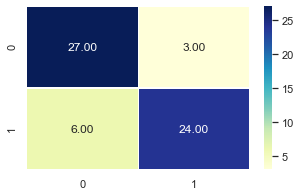

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

print("The classification report is as follows:")

print(classification_report(y_test, y_pred_lr))

print("The confusion matrix is as follows:")

fig, ax = plt.subplots(figsize=(5,3))

ax = sns.heatmap(confusion_matrix(y_test, y_pred_lr),
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

**Naive Bayes:**

In [61]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
score_nb = round(accuracy_score(y_pred_nb, y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 80.0 %


The classification report is as follows:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.85      0.73      0.79        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60

The confusion matrix is as follows:


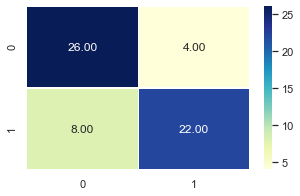

In [63]:
print("The classification report is as follows:")

print(classification_report(y_test, y_pred_nb))

print("The confusion matrix is as follows:")

fig, ax = plt.subplots(figsize=(5,3))

ax = sns.heatmap(confusion_matrix(y_test, y_pred_nb),
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

**SVM:**

In [64]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

y_pred_svm = sv.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
score_svm = round(accuracy_score(y_pred_svm, y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.33 %


The classification report is as follows:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        30
           1       0.92      0.73      0.81        30

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60

The confusion matrix is as follows:


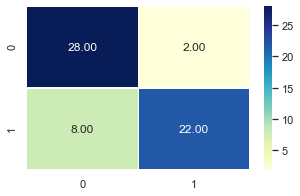

In [66]:
print("The classification report is as follows:")

print(classification_report(y_test, y_pred_svm))

print("The confusion matrix is as follows:")

fig, ax = plt.subplots(figsize=(5,3))

ax = sns.heatmap(confusion_matrix(y_test, y_pred_svm),
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

**K Nearest Neighbors:**

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [68]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 63.33 %


The classification report is as follows:
              precision    recall  f1-score   support

           0       0.62      0.70      0.66        30
           1       0.65      0.57      0.61        30

    accuracy                           0.63        60
   macro avg       0.64      0.63      0.63        60
weighted avg       0.64      0.63      0.63        60

The confusion matrix is as follows:


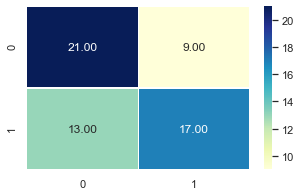

In [69]:
print("The classification report is as follows:")

print(classification_report(y_test, y_pred_knn))

print("The confusion matrix is as follows:")

fig, ax = plt.subplots(figsize=(5,3))

ax = sns.heatmap(confusion_matrix(y_test, y_pred_knn),
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

**Decision Tree:**

In [70]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt, y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [71]:
score_dt = round(accuracy_score(y_pred_dt, y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 76.67 %


The classification report is as follows:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.75      0.80      0.77        30

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60

The confusion matrix is as follows:


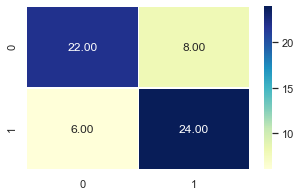

In [72]:
print("The classification report is as follows:")

print(classification_report(y_test, y_pred_dt))

print("The confusion matrix is as follows:")

fig, ax = plt.subplots(figsize=(5,3))

ax = sns.heatmap(confusion_matrix(y_test, y_pred_dt),
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

**XGBoost:**

In [73]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
score_xgb = round(accuracy_score(y_pred_xgb, y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 80.0 %


The classification report is as follows:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.78      0.83      0.81        30

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60

The confusion matrix is as follows:


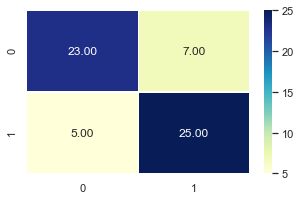

In [75]:
print("The classification report is as follows:")

print(classification_report(y_test, y_pred_xgb))

print("The confusion matrix is as follows:")

fig, ax = plt.subplots(figsize=(5,3))

ax = sns.heatmap(confusion_matrix(y_test, y_pred_xgb),
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

**Neural Network:**

In [76]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type

In [77]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=28))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [78]:
model.fit(X_train, y_train, epochs=300)

Instructions for updating:
Use tf.cast instead.
Epoch 1/300
237/237 [==============================] - 1s 3ms/step - loss: 5.1675 - accuracy: 0.4852
Epoch 2/300
237/237 [==============================] - 0s 139us/step - loss: 5.0443 - accuracy: 0.4135
Epoch 3/300
237/237 [==============================] - 0s 190us/step - loss: 4.7158 - accuracy: 0.4641
Epoch 4/300
237/237 [==============================] - 0s 169us/step - loss: 4.4529 - accuracy: 0.4388
Epoch 5/300
237/237 [==============================] - 0s 156us/step - loss: 4.1242 - accuracy: 0.4810
Epoch 6/300
237/237 [==============================] - 0s 135us/step - loss: 3.7275 - accuracy: 0.4093
Epoch 7/300
237/237 [==============================] - 0s 152us/step - loss: 3.1527 - accuracy: 0.4895
Epoch 8/300
237/237 [==============================] - 0s 190us/step - loss: 2.4826 - accuracy: 0.4979
Epoch 9/300
237/237 [==============================] - 0s 139us/step - loss: 2.0280 - accuracy: 0.5274
Epoch 10/300
237/237 [=====

237/237 [==============================] - 0s 114us/step - loss: 0.3464 - accuracy: 0.8270
Epoch 78/300
237/237 [==============================] - 0s 105us/step - loss: 0.3332 - accuracy: 0.8608
Epoch 79/300
237/237 [==============================] - 0s 97us/step - loss: 0.3509 - accuracy: 0.8186
Epoch 80/300
237/237 [==============================] - 0s 122us/step - loss: 0.3352 - accuracy: 0.8439
Epoch 81/300
237/237 [==============================] - 0s 118us/step - loss: 0.3287 - accuracy: 0.8565
Epoch 82/300
237/237 [==============================] - 0s 122us/step - loss: 0.3241 - accuracy: 0.8608
Epoch 83/300
237/237 [==============================] - 0s 110us/step - loss: 0.3499 - accuracy: 0.8523
Epoch 84/300
237/237 [==============================] - 0s 110us/step - loss: 0.3283 - accuracy: 0.8734
Epoch 85/300
237/237 [==============================] - 0s 169us/step - loss: 0.3264 - accuracy: 0.8439
Epoch 86/300
237/237 [==============================] - 0s 156us/step - loss: 

237/237 [==============================] - 0s 80us/step - loss: 0.3021 - accuracy: 0.8565
Epoch 156/300
237/237 [==============================] - 0s 80us/step - loss: 0.3100 - accuracy: 0.8439
Epoch 157/300
237/237 [==============================] - 0s 84us/step - loss: 0.3112 - accuracy: 0.8608
Epoch 158/300
237/237 [==============================] - 0s 80us/step - loss: 0.3284 - accuracy: 0.8354
Epoch 159/300
237/237 [==============================] - 0s 105us/step - loss: 0.3097 - accuracy: 0.8692
Epoch 160/300
237/237 [==============================] - 0s 83us/step - loss: 0.3116 - accuracy: 0.8776
Epoch 161/300
237/237 [==============================] - 0s 80us/step - loss: 0.3227 - accuracy: 0.8565
Epoch 162/300
237/237 [==============================] - 0s 97us/step - loss: 0.3122 - accuracy: 0.8650
Epoch 163/300
237/237 [==============================] - 0s 89us/step - loss: 0.3267 - accuracy: 0.8523
Epoch 164/300
237/237 [==============================] - 0s 84us/step - loss:

237/237 [==============================] - 0s 76us/step - loss: 0.3146 - accuracy: 0.8565
Epoch 234/300
237/237 [==============================] - 0s 110us/step - loss: 0.3202 - accuracy: 0.8608
Epoch 235/300
237/237 [==============================] - 0s 72us/step - loss: 0.3067 - accuracy: 0.8650
Epoch 236/300
237/237 [==============================] - 0s 72us/step - loss: 0.3085 - accuracy: 0.8608
Epoch 237/300
237/237 [==============================] - 0s 72us/step - loss: 0.3039 - accuracy: 0.8650
Epoch 238/300
237/237 [==============================] - ETA: 0s - loss: 0.2663 - accuracy: 0.87 - 0s 80us/step - loss: 0.3123 - accuracy: 0.8861
Epoch 239/300
237/237 [==============================] - 0s 80us/step - loss: 0.3183 - accuracy: 0.8692
Epoch 240/300
237/237 [==============================] - 0s 72us/step - loss: 0.3016 - accuracy: 0.8819
Epoch 241/300
237/237 [==============================] - 0s 80us/step - loss: 0.3359 - accuracy: 0.8354
Epoch 242/300
237/237 [============

In [79]:
y_pred_nn = model.predict(X_test)

In [80]:
rounded = [round(x[0]) for x in y_pred_nn]

y_pred_nn = rounded

In [81]:
score_nn = round(accuracy_score(y_pred_nn,y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 83.33 %


The classification report is as follows:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        30
           1       0.86      0.80      0.83        30

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

The confusion matrix is as follows:


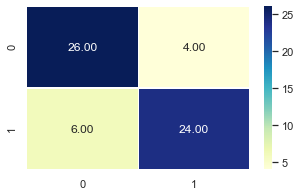

In [82]:
print("The classification report is as follows:")

print(classification_report(y_test, y_pred_nn))

print("The confusion matrix is as follows:")

fig, ax = plt.subplots(figsize=(5,3))

ax = sns.heatmap(confusion_matrix(y_test, y_pred_nn),
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

**Random Forest:**

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 200, random_state = 0)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [84]:
score_rf = round(accuracy_score(y_pred_rf, y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 83.33 %


The classification report is as follows:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        30
           1       0.86      0.80      0.83        30

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

The confusion matrix is as follows:


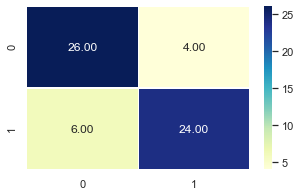

In [85]:
print("The classification report is as follows:")

print(classification_report(y_test, y_pred_rf))

print("The confusion matrix is as follows:")

fig, ax = plt.subplots(figsize=(5,3))

ax = sns.heatmap(confusion_matrix(y_test, y_pred_rf),
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

**Output Final Score:**

In [86]:
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_rf, score_xgb, score_nn]
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", 
              "Random Forest", "XGBoost", "Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.0 %
The accuracy score achieved using Naive Bayes is: 80.0 %
The accuracy score achieved using Support Vector Machine is: 83.33 %
The accuracy score achieved using K-Nearest Neighbors is: 63.33 %
The accuracy score achieved using Decision Tree is: 76.67 %
The accuracy score achieved using Random Forest is: 83.33 %
The accuracy score achieved using XGBoost is: 80.0 %
The accuracy score achieved using Neural Network is: 83.33 %


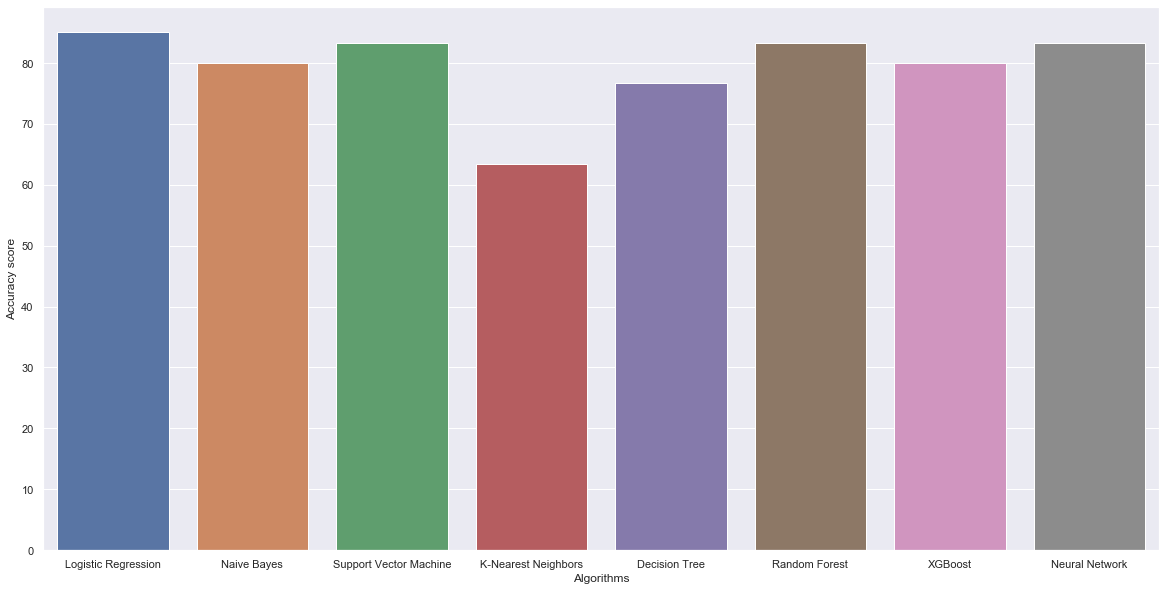

In [87]:
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

**INSIGHT:** We can see that the Logistic Regression algorithm has the highest accuracy.